# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 6. Поиск эволюционирующих шаблонов с помощью матричного профиля ряда.**

In [1]:
%load_ext autoreload
%autoreload 2

## **Часть 1.** Поиск цепочек временного ряда.

Импорт библиотек и модулей

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stumpy
from sklearn.metrics import mean_squared_error

В первом задании вам предстоит выполнить поиск эволюционирующих шаблонов временного ряда. Выполните считывание набора данных [Rotation Matrix](datasets/Rotation%20Matrix.txt), найдите в нем самую длинную цепочку и выведите индексы начала звеньев этой цепочки.

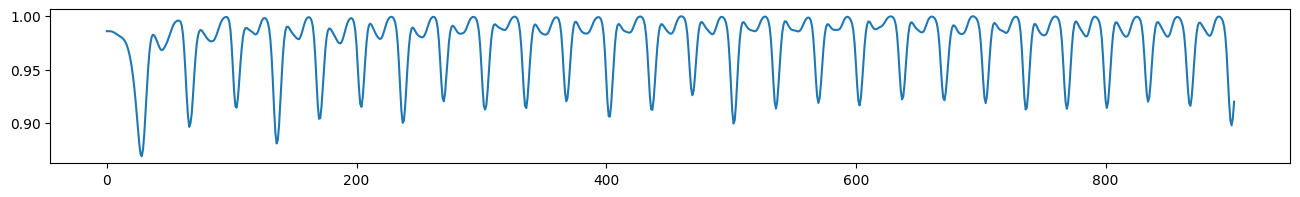

In [3]:
fig, ax = plt.subplots(figsize=(16, 2))
ts = np.loadtxt('datasets/Rotation Matrix.txt')
ax.plot(ts)

In [28]:
m = 35
mp = stumpy.stump(ts, m)
s, c = stumpy.allc(mp[:,2], mp[:,3])
c

array([ 29,  67, 135, 401, 501], dtype=int64)

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Из полученных результатов, можно сделать вывод, что есть 5 звеньев цепочки.

## **Часть 2. Визуализация цепочек**

Выполните визуализацию найденных в прошлом задании цепочек: постройте график временного ряда, на котором выделены звенья цепочек. Также постройте график, на котором изображены только сами звенья.

In [29]:
def get_links():
    c_shape = c.shape[0]
    for i in range(c_shape):
        y = ts[c[i]:c[i]+m]
        x = range(c[i], c[i]+m)
        plt.plot(x, y, linewidth=2)

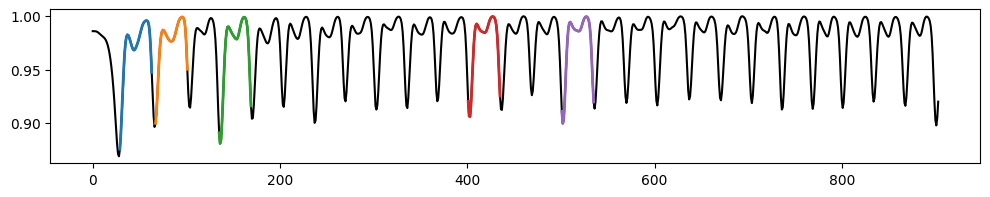

In [30]:
plt.figure(figsize=(12,2))
plt.plot(ts, color='black')

get_links()

plt.show()

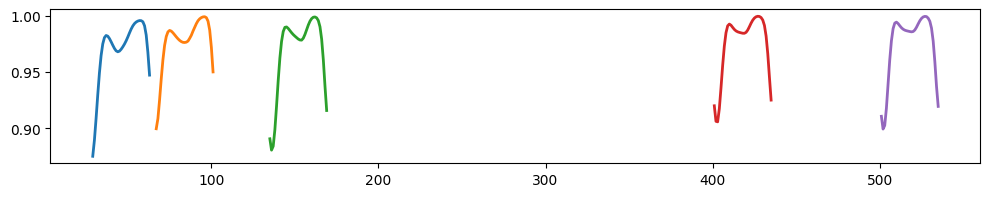

In [31]:
plt.figure(figsize=(12,2))

get_links()
    
plt.show()

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Исходя из полученных результатов можно сделать вывод, что звенья имеют схожую форму, но размер отличается.

## **Часть 3.** Предсказывание значений ряда на основе цепочек.

Предскажите значения последнего звена цепочки, вычислив разность между двумя предыдущими звеньями цепочки. Сравните полученное предсказание с истинным значением.

In [35]:
y1 = ts[c[2]:c[2]+m]
x1 = np.array([i for i in range(c[2], c[2] + m)])

y2 = ts[c[3]:c[3]+m]
x2 = np.array([i for i in range(c[3], c[3] + m)])

y3 = y2 + (y2 - y1)
x3 = x2 + (x2 - x1)

In [36]:
y_true = ts[c[4]:c[4]+m]
x_true = np.array([i for i in range(c[4], c[4] + m)])

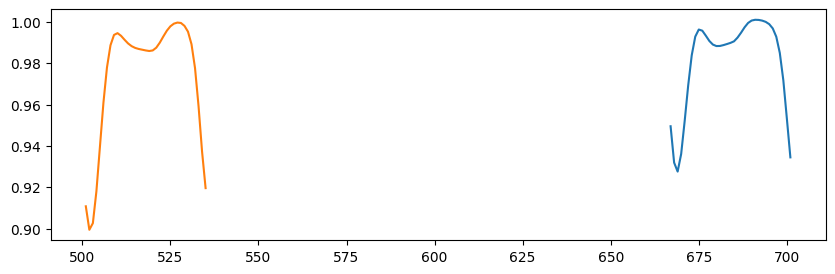

In [37]:
plt.figure(figsize=(10,3))
plt.plot(x3, y3)
plt.plot(x_true, y_true)
plt.show()

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Иходя из полученных результатов, предсказание по форме получилось верное, но по размеру и позиции не совпало.